<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/EE_DTRW_Real_Planar_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

Image("imk.png",width=600)


SyntaxError: ignored

In [ ]:
import Stats_EE_recurr_cal

In [ ]:
help(Stats_EE_recurr_cal.Abs_diff_mag_EE)

Help on function Abs_diff_mag_EE in module Stats_EE_recurr_cal:

Abs_diff_mag_EE(nodes, DTRW_time_series_dict, thresh_array)



In [ ]:
!pip install osmnx

In [ ]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.1 which is incompatible.


In [ ]:
import math as m
#from math import comb
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import osmnx as ox
import pickle

ModuleNotFoundError: ignored

#Defining function for plotting work

In [ ]:
def scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker="o"):
  plt.scatter(xarr,yarr,s=dotsize, c=None, marker=None, cmap=None, norm=None,
  vmin=None, vmax=None, alpha=opacity, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
def Box_Plot(xrr,xlabel,ylabel,title,label):
  plt.title(title)
  plt.boxplot(xarr,showmeans=True,  labels=label,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
def HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize):
  fig=plt.figure(figsize=fsize)
  plt.hist(array, bins=bins, range=None, density=normalized, weights=None, cumulative=False,
  bottom=None, histtype='bar', align=alingm, orientation='vertical', rwidth=width,
  log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
def XY_plotting(x,y,xlabel,ylabel,title,linestyle,linewidth,color):
  plt.plot(x,y,ls=linestyle,lw=linewidth,c=color)
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
def plotting_walker_time_Series(degree,TimeS_dict,node):
  #degre=G.degree[a]
  node_time=TimeS_dict[node]
  l=np.array(node_time)
  #print(l.shape)
  plt.ylim(0,np.max(l[::,1])+5)
  plt.scatter(l[::,0],l[::,1],s=3,c=None, marker=None, cmap=None,
              norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  plt.xlabel("Time(s)")
  plt.ylabel("Number of Walkers")
  plt.title("Variation of Number of walkers with continous\n time on a node of degree "+str(degree))
  #print("total numbers of walkers % passes in time %"%(sum(l[::,0]),max(l[::,1])))
  #plt.yticks([i for i in range(m.ceil(max(l[::,1])))])
  #print(l)
  plt.show()

  plt.title('Box plot')
  plt.boxplot(l[::,1],showmeans=True,  labels=None,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel("Number of walkers")
  plt.grid()
  plt.show()

##Defining function for curve fitting

In [ ]:
def objective(x, a, b,c):
	return (a * x**b) + c
def curve_fitting(xx,yy):
  x=xx
  y=yy
  # curve fit
  popt, _ = curve_fit(objective, x, y)
  # summarize the parameter￼
￼
 values
  a, b, c= popt
  # plot input vs output
  plt.scatter(x, y)
  # define a sequencey of inputs between the smallest and largest known inputs
  #x_line = np.arange(min(x), max(x), 1)
  # calculate the output for the range
  #a,b,c=np.round(a),np.round(b),np.round(c)
  y_line = objective(x, a, b,c)
  print("scaling=",a,"exponent=",b,"shifting=",c)
  # create a line plot for the mapping function
  label=r'$ax^b +c$'+'a= '+str(a)+'b='+str(b)+'c='+str(c)
  plt.plot(x, y_line, '--', color='red')
  plt.show()

##Curve fitting using sklearn library

In [ ]:
def LinearR_sklearn(xarr,yarr):
  regr = LinearRegression()
  x=xarr.reshape(-1, 1)
  y=yarr.reshape(-1,1)
  regr.fit(x, y)
  y_pred = regr.predict(x)
  slope=np.round(regr.coef_[0,0],1)
  intercepts=np.round(regr.intercept_[0],1)
  #R_2=r2(y,y_pred)
  RMSE=m.sqrt(mse(y,y_pred))
  return y_pred,slope,intercepts#,R_2,RMSE

In [ ]:
r'$ax^b +c '#+'a= '+str(2)+'b='+str(2)+'c='+str(2)

'$ax^b +c '

#Defining function for writing and reading data from a binary file

In [ ]:
def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

#Functions defined for categorizing nodes of same degree

In [ ]:
def plotting_degree_distribution(nodes_degrees):
  nodes_degreewiseFrequency=[]
  for i in nodes_degrees:
   nodes_degreewiseFrequency.append([i[0],len(i[1])])
  nodes_degreewiseFrequency=np.array(nodes_degreewiseFrequency)
  fig=plt.figure(figsize=(10,5))
  plt.bar(nodes_degreewiseFrequency[::,0],nodes_degreewiseFrequency[::,1])
  plt.xlabel("Degrees")
  plt.ylabel("Frequency")
  plt.title("Degree Distribution")
  #plt.xticks([i for i in range(5,130,5)])
def nodes_with_same_Degree(node_Degree_dict):
  Degrees=list(set(node_Degree_dict.values()))
  nodes_degree=[]
  for i in Degrees:
    x=[]
    for j,k in node_Degree_dict.items():
      if i==k:
         x.append(j)
    nodes_degree.append([i,x])
  return nodes_degree
def nodes_with_degree_osmnxdata(G):
  nodeAdegree=[]
  list_degree=G.degree()
  #degre=m.ceil(G1.degree[a]/2)
  degrees=set([m.ceil(i[1]/2) for i in list_degree])
  max_deg=max(list(degrees))
  for i in degrees:
    x=[v for v,d in G.degree() if m.ceil(d/2)==i]
    nodeAdegree.append([i,x])
  return nodeAdegree

In [ ]:
#defining a function that gives the next position of a walker
def adjacency_list_nodeDegree_osmnxG(G,nodes):
  G_unD=nx.to_undirected(G)
  adjacency_list={i:[j for j in G_unD.neighbors(i)] for i in range(nodes)}
  node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
  return adjacency_list,node_Degree_dict
def next_pos(adjacency_list,node_Degree_dict,pos,alpha):
  neig=adjacency_list[pos]
  Deg_arr=np.array([node_Degree_dict[i] for i in neig],dtype=float)
  Deg_arr_=np.power(Deg_arr,alpha)
  prob=[j/sum(Deg_arr_) for j in Deg_arr_]
  next_pos=np.random.choice(neig,size=None, replace=True, p=prob)
  return next_pos
#numbers of walkers on a particular node at different time
#row represents the  descrete time
#Column represents the nodes
def DTRW_Time_Series(adjacency_list,node_Degree_dict,num_walkers,time,nodes,alpha):
  walkers_pos_trac=np.zeros((time,num_walkers))
  walkers_init_pos=np.random.randint(0,int(nodes),int(num_walkers))#initial position of a walkers
  walkers_pos_trac[0,::]=walkers_init_pos
  for j in range(num_walkers):
    for i in range(time):
      if i==time-1:
          break
      k=next_pos(adjacency_list,node_Degree_dict,walkers_pos_trac[i,j],0)
      walkers_pos_trac[i+1,j]=k
  num_wal_nodes_=np.zeros((time,nodes))
  for i in range(time):
      for j in range(0,nodes):
          m=walkers_pos_trac[i,::]
          c=np.count_nonzero(m==j)
          num_wal_nodes_[i,j]=c
  Time_series_nodewise_dict={}
  for node in range(nodes):
    Time_series_nodewise_dict[node]=num_wal_nodes_[::,node]
  return Time_series_nodewise_dict
def mean_std_walkers_nodewise(time_series_each_node,nodes):
  dic_mean_walkers={}
  dic_std_walkers={}
  for node in range(nodes):
    new_array=np.array(time_series_each_node[node])
    dic_mean_walkers[node]=np.mean(np.array([i for i in new_array ]))
    dic_std_walkers[node]=np.std(np.array([i for i in new_array]))
  return dic_mean_walkers,dic_std_walkers

#----------------------------------------------------------------------------------------------------------------
def walkers_statistic_degreewise(nodes_degrees,dic_mean_walkers ,dic_std_walkers):
  dic_meanW_PER_node_degreewise={}
  dic_stdW_PER_node_degreewise={}
  for nodes in nodes_degrees:
    deg=nodes[0]
    sameDeg_nodes=nodes[1]
    dic_meanW_PER_node_degreewise[deg]=[dic_mean_walkers[n] for n in sameDeg_nodes ]
    dic_stdW_PER_node_degreewise[deg]=[dic_std_walkers[n] for n in sameDeg_nodes]
  Average_walk_degreewise=np.array([[i,np.mean(np.array(dic_meanW_PER_node_degreewise[i]))] for i in dic_meanW_PER_node_degreewise])
  Std_walk_degreewise=np.array([[j,np.mean(np.array(dic_stdW_PER_node_degreewise[j]))] for j in dic_stdW_PER_node_degreewise])
  return Average_walk_degreewise,Std_walk_degreewise
#Extreme event probability calculation
def ExtremeEventProb(Nodes,nodes_degrees,Scaling_factor,time_series_each_node,dic_mean_walkers,dic_std_walkers):
  Extreme_event_nodewise={}
  thresh_hold_Arr={}
  for node in range(Nodes):
    #print(node)
    walkers_array=np.array(time_series_each_node[node])
    #print(walkers_array)
    threshold=dic_mean_walkers[node]+Scaling_factor*dic_std_walkers[node]
    #print(threshold)
    thresh_hold_Arr[node]=threshold
    Extreme_event_nodewise[node]=np.count_nonzero((np.where( walkers_array>threshold, 1,0)))/float(np.size(walkers_array))
  Extreme_event_prob_degreewise={}
  for i in nodes_degrees:
     Extreme_event_prob_degreewise[i[0]]=np.mean(np.array([Extreme_event_nodewise[j] for j in i[1]]))
  return thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise
def Extreme_Event_recurrenceTime_eachnode(Nodes,time_series_each_node,threshold_array):
  nodewise_timeDiff={}
  for node in range(Nodes):
    walkers_array=np.array(time_series_each_node[node])
    only_time=np.array([i for i in range(len(walkers_array))])
    threshold=threshold_array[node]
    Extreme_event_points=np.where( walkers_array>threshold,1,-1)
    Time_values=np.multiply(Extreme_event_points,only_time)
    exact_time_values=Time_values[np.where(Time_values>=0)]
    Time_diff=[]
    for i in range(len(exact_time_values)-1):
        Time_diff.append(exact_time_values[i+1]-exact_time_values[i])
    nodewise_timeDiff[node]=Time_diff
  return nodewise_timeDiff
def Average_recurrenceTime__Node_Degreewise(nodes,nodes_degrees,RecurrenArray_nodewise):
  dic_average_RecurrenceTime_nodewise={}
  for i in range(nodes):
    dic_average_RecurrenceTime_nodewise[i]=np.mean(np.array([RecurrenArray_nodewise[i]]))
  dic_average_RecurrenceTime_degreewise={}
  for j in nodes_degrees:
      dic_average_RecurrenceTime_degreewise[j[0]]=np.mean(np.array([dic_average_RecurrenceTime_nodewise[k] for k in j[1]]))
  return  dic_average_RecurrenceTime_nodewise,dic_average_RecurrenceTime_degreewise
def Absolute_diff_mag_EE(Nodes,time_series_each_node,threshold_array):
  nodewise_EE_abs_diff={}
  for node in range(Nodes):
    walkers_array=np.array(time_series_each_node[node])
    only_time=np.array([i for i in range(0,len(walkers_array))])
    threshold=threshold_array[node]
    Extreme_event_values=np.where( walkers_array>threshold,walkers_array,0)
    Exact_EE_values=Extreme_event_values[np.where(Extreme_event_values!=0)]
    EE_abs_diff=[]
    for i in range(len(Exact_EE_values)-1):
          EE_abs_diff.append(abs(Exact_EE_values[i+1]-Exact_EE_values[i]))
    nodewise_EE_abs_diff[node]=EE_abs_diff
  return nodewise_EE_abs_diff
def Average_Absolute_diff_mag_EE__Node_Degreewise(nodes,nodes_degrees,nodewise_EE_abs_diff):
  dic_average_Absolute_diff_mag_EE_nodewise={}
  for i in range(nodes):
    dic_average_Absolute_diff_mag_EE_nodewise[i]=np.mean(np.array([nodewise_EE_abs_diff[i]]))
  dic_average_Absolute_diff_mag_EE_degreewise={}
  for j in nodes_degrees:
      dic_average_Absolute_diff_mag_EE_degreewise[j[0]]=np.mean(np.array([dic_average_Absolute_diff_mag_EE_nodewise[k] for k in j[1]]))
  return  dic_average_Absolute_diff_mag_EE_nodewise,dic_average_Absolute_diff_mag_EE_degreewise

#Constructing a Graph in networkx

In [ ]:
location_point=(28.7041, 77.1025)   #Delhi coordinates
G_nx=ox.graph_from_point(location_point,dist=1000,network_type="drive")
osmids = list(G_nx.nodes)
G_ = nx.relabel.convert_node_labels_to_integers(G_nx)
G_proj = ox.project_graph(G_nx)
G_nx = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=5, dead_ends=False)
osmids = list(G_nx.nodes)
G_nx = nx.relabel.convert_node_labels_to_integers(G_nx)
# give each node its original osmid as attribute since we relabeled them
osmid_values = {k: v for k, v in zip(G_nx.nodes, osmids)}
nx.set_node_attributes(G_nx, osmid_values, "osmid")

NameError: ignored

In [ ]:
#taking data
nodes=G_nx.number_of_nodes()
Edges=G_nx.number_of_edges()
planar_density=Edges/(3*nodes-6)
print(planar_density,nodes,Edges)
num_walkers=5000  #number of walkers
time=100000#number of steps taken


0.9856269113149847 1092 3223


##Computing adjacency list and a Dictionary containing degree of each node

In [ ]:
nodes=G_nx.number_of_nodes()
adjacency_list,node_Degree_dict=adjacency_list_nodeDegree_osmnxG(G_nx,nodes)

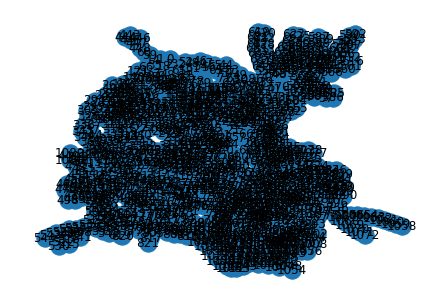

In [ ]:
nx.draw_kamada_kawai(G_nx,with_labels=True)

#Degree Distribution

##Original Graph(without consolidation)

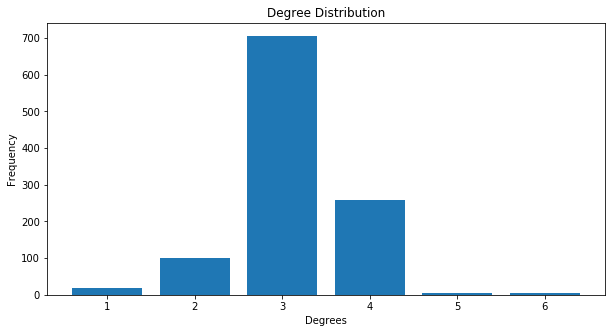

In [ ]:
Nodes_with_Degree=nodes_with_same_Degree(node_Degree_dict)
plotting_degree_distribution(Nodes_with_Degree)

##Consolidated Graph

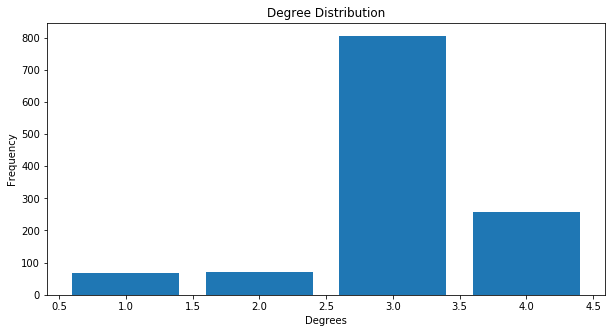

In [ ]:
Nodes_with_Degree=nodes_with_same_Degree(node_Degree_dict)
plotting_degree_distribution(Nodes_with_Degree)

#Creating Time Series

In [ ]:
TimeSeries_each_node_dict=DTRW_Time_Series(adjacency_list,node_Degree_dict,num_walkers,time,nodes,0)

NameError: ignored

##Saving time series in a file

In [ ]:
file_name="N_"+str(nodes)+"_E_"+str(Edges)+"_simT"+str(time)+"s_DT_walkers_"+str(num_walkers)+"_Delhi"
storeData(TimeSeries_each_node_dict,file_name)

##Retriving time series from a file



In [ ]:
#TimeSeries_each_node_dict=loadData()
dbfile = open("N_1092_E_3223_simT10000s_DT_walkers_5000_Delhi", 'rb')
TimeSeries_each_node_dict= pickle.load(dbfile)

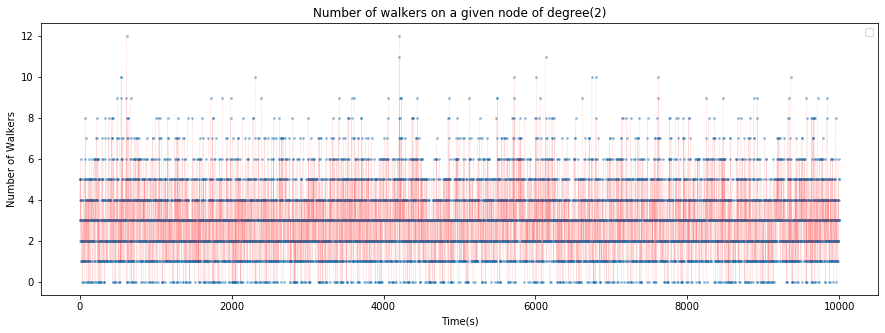

In [ ]:
#plotting a graph showing number of walkers on a particular node with time
node=0
plt.figure(figsize=(15,5))
xlabel,ylabel,title='Time(s)','Number of Walkers','Number of walkers on a given node of degree('+str(node_Degree_dict[node])+')'
x,y=[i for i in range(len(TimeSeries_each_node_dict[node]))],TimeSeries_each_node_dict[node]
XY_plotting(x,y,xlabel,ylabel,title,':',.1,'r')
scatter_Plot(x,y,xlabel,ylabel,title,dotsize=3,opacity=0.4,marker=".")
plt.show()

In [ ]:
#calculating total number of walkers on a particular node from the whole simulation
bin_dis=np.zeros((num_walkers+1,nodes))
for j in range(nodes):
  for i in range(0,num_walkers+1):
    b=num_wal_nodes_[::,j]
    count=np.count_nonzero(b==i)
    bin_dis[i,j]=count

#Distribution of walkers on a node

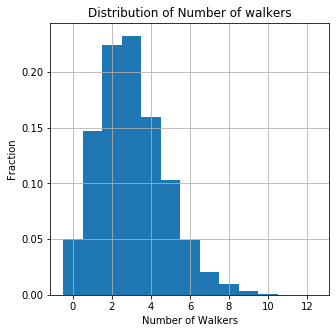

In [ ]:
node=0
walkers_arr=np.array(TimeSeries_each_node_dict[node])
bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
fsize=(5,5)
align='left'
xlabel,ylabel,title="Number of Walkers","Fraction","Distribution of Number of walkers"
HistoGram(walkers_arr,bins,True,1,xlabel,ylabel,align,title,fsize)

#Computing average and standard deviation of walkers for each node

In [ ]:
dic_mean_walkers ,dic_std_walkers=mean_std_walkers_nodewise(TimeSeries_each_node_dict,nodes)

##Distribution of Average numbers of walkers computed for all nodes

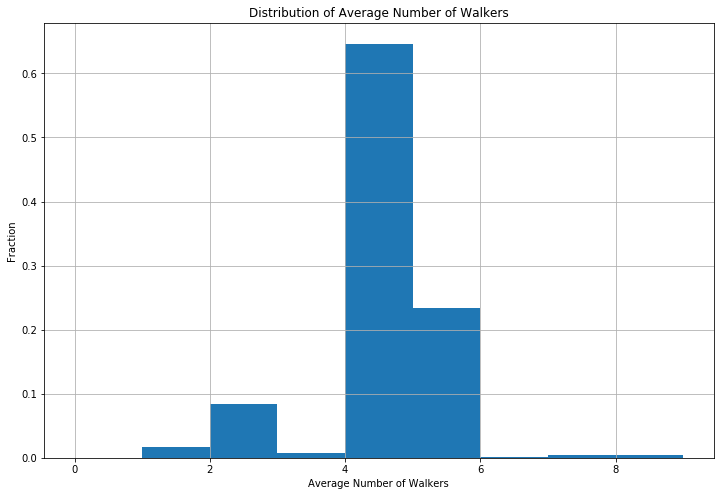

In [ ]:
mean_walkers =np.array([dic_mean_walkers[i] for i in dic_mean_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[i for i in range(0,int(max(mean_walkers))+2)]
fsize=(12,8)
xlabel,ylabel,title="Average Number of Walkers","Fraction","Distribution of Average Number of Walkers"
HistoGram(mean_walkers ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Standard deviation of numbers of walkers computed for all nodes

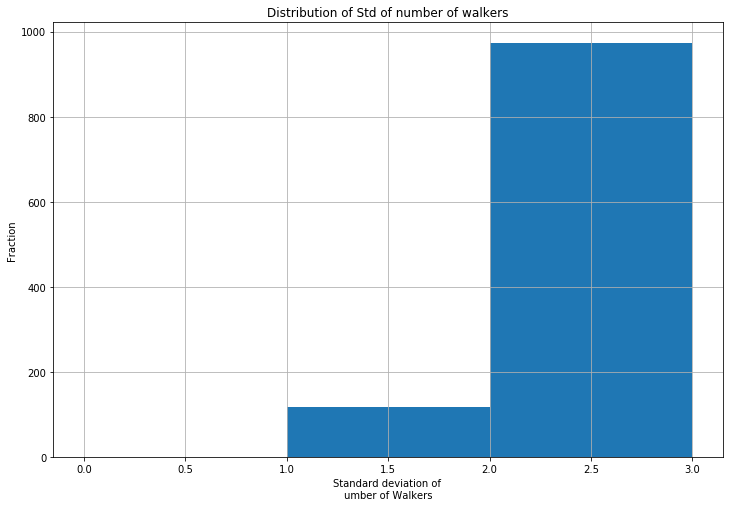

In [ ]:
std_walkers =np.array([dic_std_walkers[i] for i in dic_std_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[i for i in range(0,int(max(std_walkers))+2)]
fsize=(12,8)
xlabel,ylabel,title="Standard deviation of \number of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(std_walkers,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
std_walkers

array([1.70022088, 2.06298731, 2.10049655, ..., 1.20311778, 1.25382021,
       2.09806453])

#Computing average and standard deviation of walkers degreewise

In [ ]:
Average_walk_degreewise,Std_walk_degreewise=walkers_statistic_degreewise(Nodes_with_Degree,dic_mean_walkers,dic_std_walkers)

##Distribution of Average numbers of walkers (Computed degreewise)

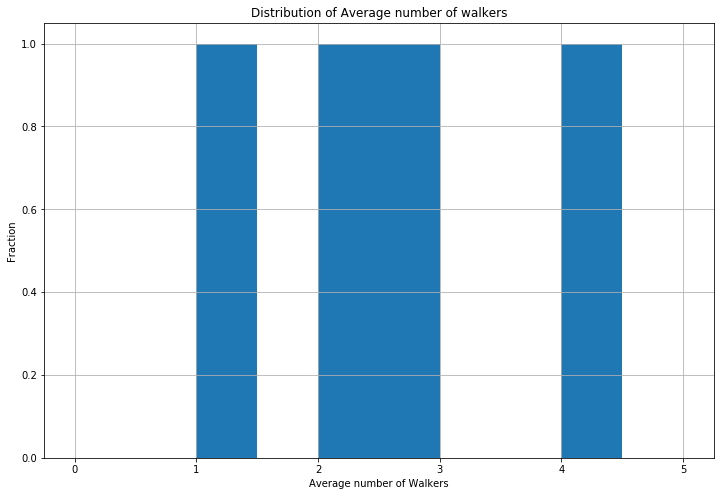

In [ ]:
Avg_walkers =np.array(Average_walk_degreewise)
Avg_walkers_only=Avg_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0,0.5 , 1.0,1.5,2.0,3,3.5,4.0,4.5,5.0]
fsize=(12,8)
xlabel,ylabel,title="Average number of Walkers","Fraction","Distribution of Average number of walkers"
HistoGram(Avg_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
def fact(n):
  return n*fact(n-1)

In [ ]:
fact(2)

RecursionError: ignored

##**Variation of average number of walkers with degree of nodes**

In [ ]:
Average_walkers_same_degree=[]
Std_walkers_same_degree=[]
labels=[]
for i in Nodes_with_Degree:
  x=[dic_mean_walkers[node] for node in i[1]]
  Average_walkers_same_degree.append(x)
  y=[dic_std_walkers[node] for node in i[1]]
  Std_walkers_same_degree.append(y)
  labels.append(str(i[0]))

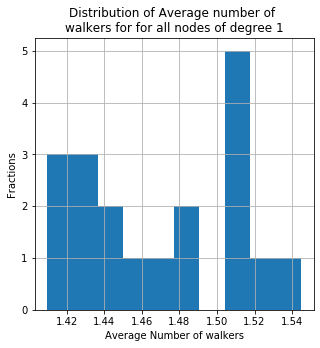

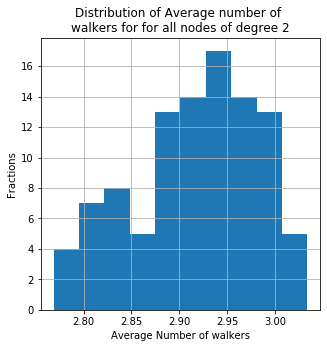

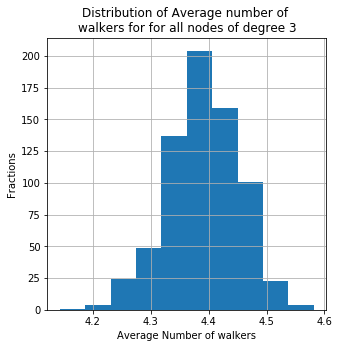

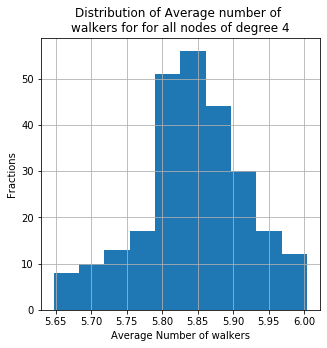

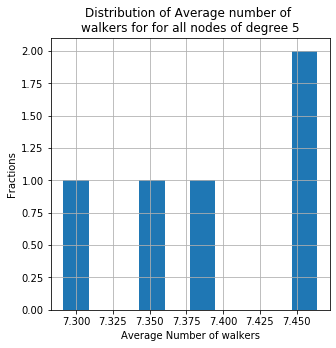

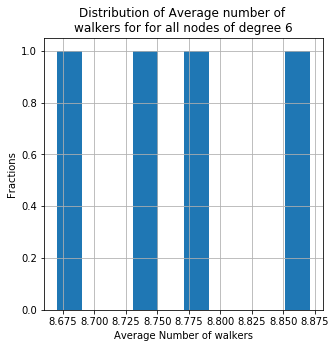

In [ ]:
xlabel,ylabel,title="Average Number of walkers","Fractions","Distribution of Average number of \nwalkers for for all nodes of degree "
for i,j in enumerate(Average_walkers_same_degree):
  bins=10
  HistoGram(j,bins,False,1,xlabel,ylabel,'mid',title+str(i+1),(5,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


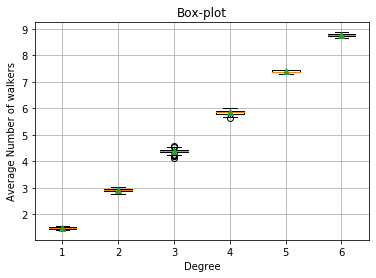

In [ ]:
xlabel,ylabel,title="Degree","Average Number of walkers","Box-plot"
xarr=Average_walkers_same_degree
Box_Plot(xarr,xlabel,ylabel,title,labels)

scaling= 1.4684688521905878 exponent= 0.9997280984693256 shifting= -0.007476840461304263


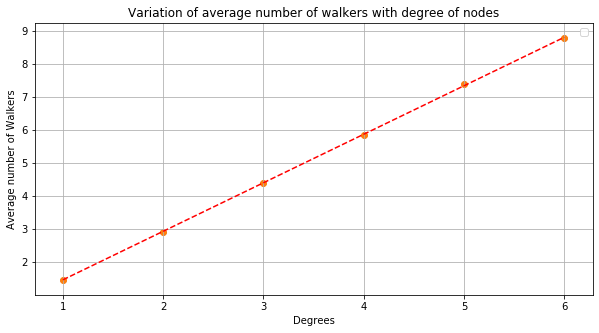

In [ ]:
xarr,yarr=Avg_walkers[::,0],Avg_walkers[::,1]
fig=plt.figure(figsize=(10,5))
xlabel="Degrees"
ylabel="Average number of Walkers"
title="Variation of average number of walkers with degree of nodes"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")
curve_fitting(xarr,yarr)

##Distribution of standard deviation of numbers of walkers(computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes.

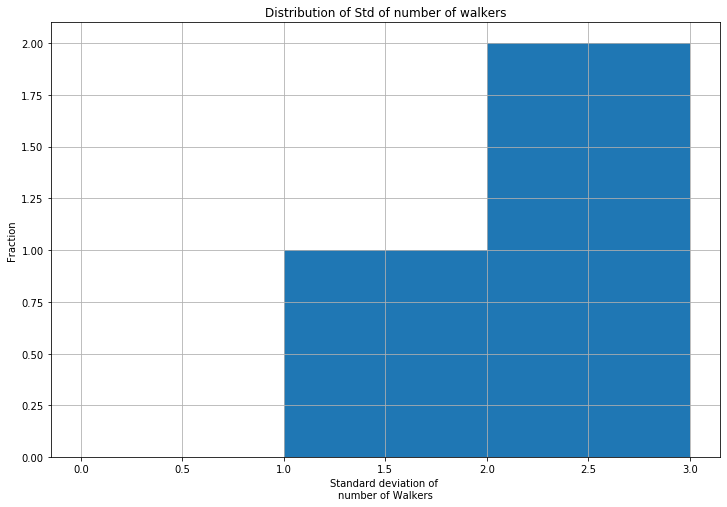

In [ ]:
Std_walkers =np.array(Std_walk_degreewise)
Std_walkers_only=Std_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=[0,0.5, 1.0,1.5,2.0,2.5,3.0 ]
fsize=(12,8)
xlabel,ylabel,title="Standard deviation of \nnumber of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(Std_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
Std_walkers

array([[1.        , 1.21045697],
       [2.        , 1.70495556],
       [3.        , 2.09330877],
       [4.        , 2.40915438],
       [5.        , 2.71019938],
       [6.        , 2.95334459]])

##**Variation of Std of number of walkers with degree of nodes**

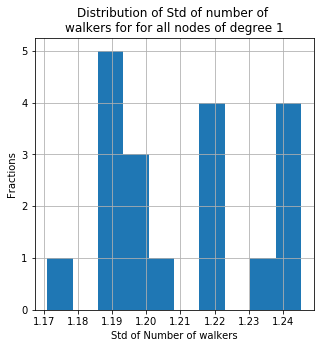

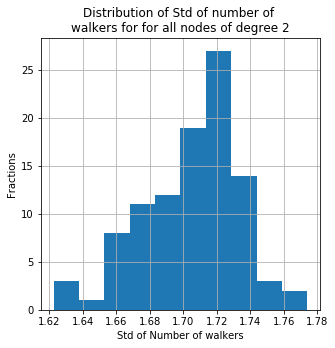

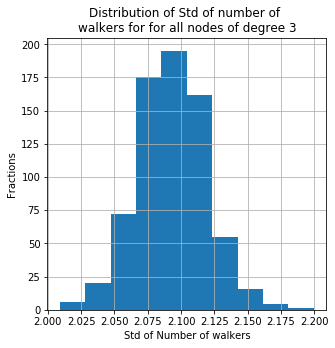

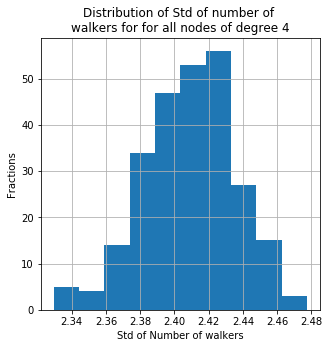

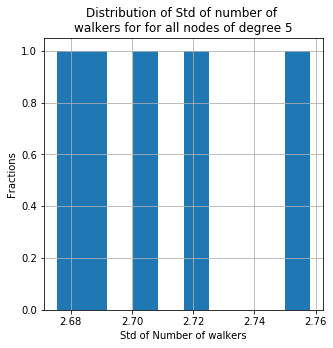

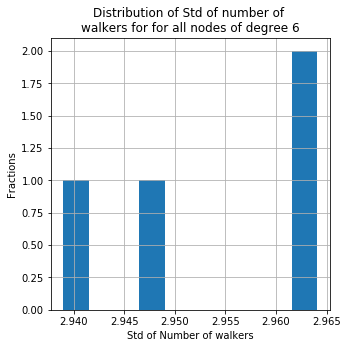

In [ ]:
xlabel,ylabel,title="Std of Number of walkers","Fractions","Distribution of Std of number of \nwalkers for for all nodes of degree "
for i,j in enumerate(Std_walkers_same_degree):
  bins=10
  HistoGram(j,bins,False,1,xlabel,ylabel,'mid',title+str(i+1),(5,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


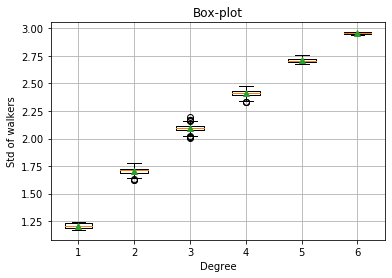

In [ ]:
xlabel,ylabel,title="Degree","Std of walkers","Box-plot"
xarr=Std_walkers_same_degree
Box_Plot(xarr,xlabel,ylabel,title,labels)

scaling= 1.1902326823382876 exponent= 0.5045481690061497 shifting= 0.019153986243422454


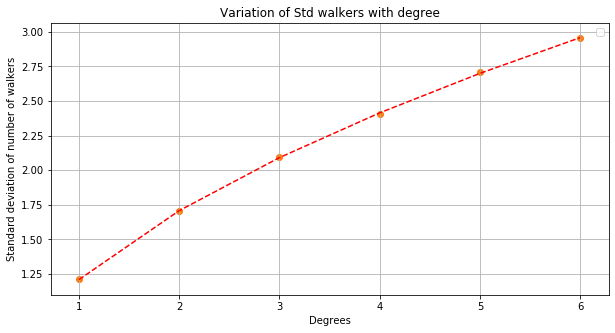

In [ ]:
xarr,yarr=Std_walkers[::,0],Std_walkers[::,1]
fig=plt.figure(figsize=(10,5))
xlabel,ylabel,title="Degrees","Standard deviation of number of walkers","Variation of Std walkers with degree"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=0.8,marker="o")
curve_fitting(xarr,yarr)

##**Variation of Standard deviation with Average number of walkers**

scaling= 1.0038467875645485 exponent= 0.49765131881779023 shifting= -0.005237722528190773


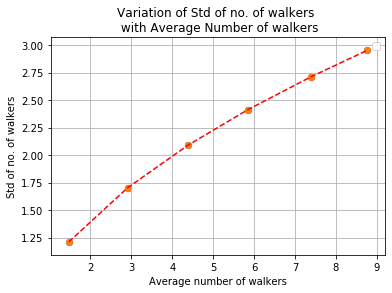

In [ ]:
xarr=Avg_walkers_only
yarr=Std_walkers_only
xlabel,ylabel,title="Average number of walkers","Std of no. of walkers","Variation of Std of no. of walkers \n with Average Number of walkers"
labels="Variation"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
curve_fitting(xarr,yarr)

#Variation of $\sigma$ with $<w>$ computed for all nodes

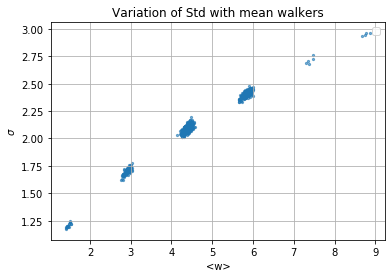

In [ ]:
xarr,yarr=np.array([dic_mean_walkers[i] for i in dic_mean_walkers]),np.array([dic_std_walkers[i] for i in dic_std_walkers])
xlabel,ylabel,title="<w>",r'$ \sigma $',"Variation of Std with mean walkers"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker=".")

#Extreme Event Probablity Computation and plotting


In [ ]:
Scaling_factor=2
threshold_dict,EEP_nodewise,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,TimeSeries_each_node_dict,dic_mean_walkers,dic_std_walkers)

##Distribution of threshold values computed for all nodes

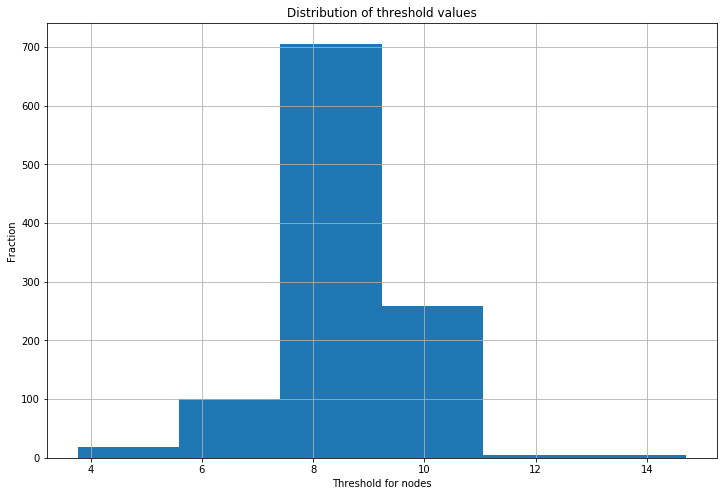

In [ ]:
threshold_values=np.array([threshold_dict[i] for i in threshold_dict])
bins=6
xlabel,ylabel,title="Threshold for nodes","Fraction","Distribution of threshold values"
HistoGram(threshold_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values(computed for all nodes)

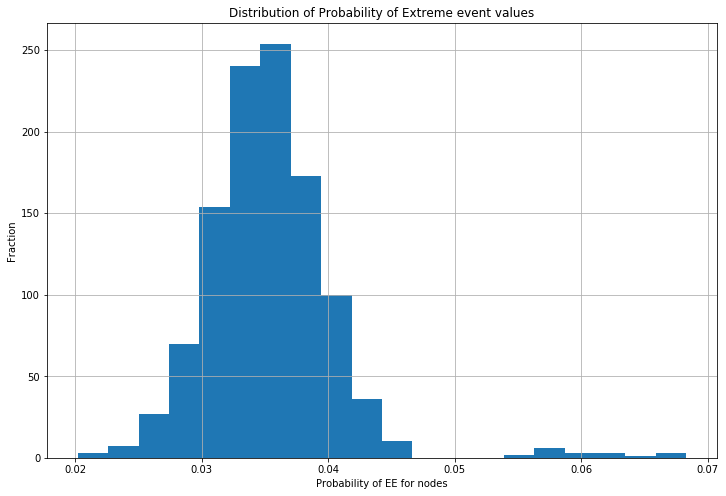

In [ ]:
ExtremeEventN_values=np.array([EEP_nodewise[i] for i in EEP_nodewise])
bins=20
xlabel,ylabel,title="Probability of EE for nodes","Fraction","Distribution of Probability of Extreme event values"
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values average over nodes of same degree

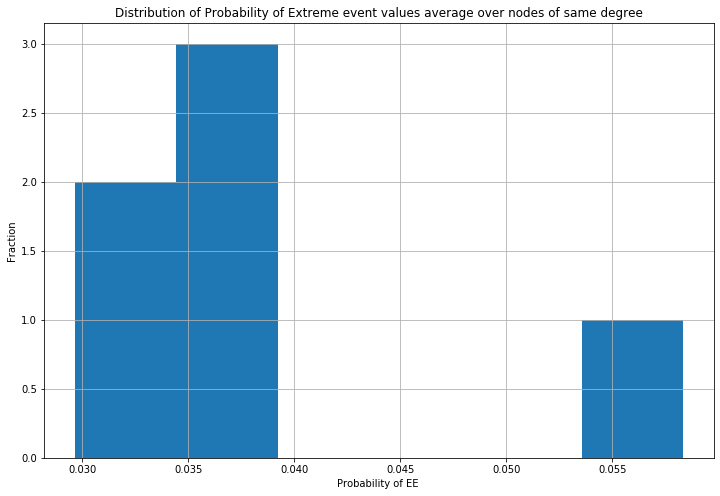

In [ ]:
ExtremeEventD_values=np.array([EEP_degreewise[i] for i in EEP_degreewise])
bins=6
xlabel,ylabel,title="Probability of EE ","Fraction","Distribution of Probability of Extreme event values average over nodes of same degree"
HistoGram(ExtremeEventD_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
ExtremeEventD_values

array([0.05835789, 0.029629  , 0.03509773, 0.03671783, 0.03708   ,
       0.03385   ])

##Variation of Probability of Occurrence of extreme event with degree of nodes





Text(0.5, 0, 'Degrees')

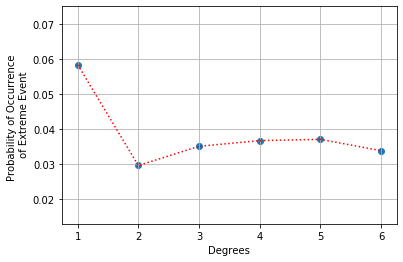

In [ ]:
extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
plt.scatter(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1])
plt.plot(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1],color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degrees")

##Variation of Probability of occurrence Extreme event with degree for different scaling parameter
we know that threshold for a node is defined as
\begin{equation}
q_i=<w_i> + m\sigma_i,
\end{equation}where m is a positive real number.

Text(0.5, 0, 'Degrees')

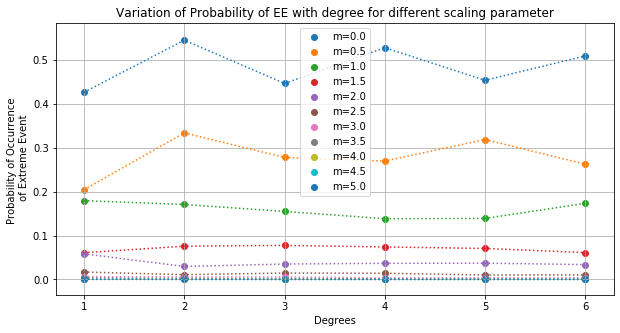

In [ ]:
fig=plt.figure(figsize=(10,5))
for i in range(0,55,5):
  m=i/10
  _,_,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,m,TimeSeries_each_node_dict,dic_mean_walkers,dic_std_walkers)
  extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
  xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
  plt.scatter(xarr,yarr,label='m='+str(m))
  plt.plot(xarr,yarr,ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.title("Variation of Probability of EE with degree for different scaling parameter")
plt.grid()
plt.legend()
plt.xlabel("Degrees")

#Computing Recurrence Time Interval

In [ ]:
recurrence_Time_each_node=Extreme_Event_recurrenceTime_eachnode(nodes,TimeSeries_each_node_dict,threshold_dict)

##Distribution of recurrence time interval for a node

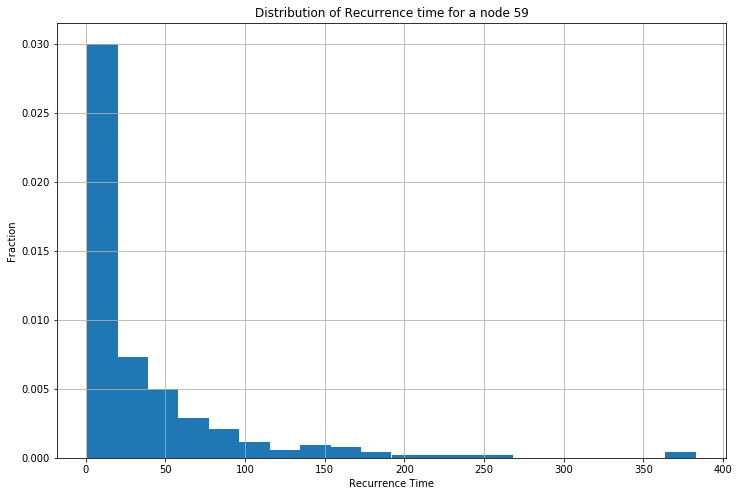

In [ ]:
node=59
recrrenceTimeNode=np.array(recurrence_Time_each_node[node])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=20
fsize=(12,8)
xlabel,ylabel,title="Recurrence Time","Fraction","Distribution of Recurrence time for a node "+str(node)
HistoGram(recrrenceTimeNode ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Computing average recurrence time for each node and also degreewise

In [ ]:
average_recurrenceT_nodewise,average_recurrenceT_degreewise=Average_recurrenceTime__Node_Degreewise(nodes,Nodes_with_Degree,recurrence_Time_each_node)

##Distribution of Recurrence Time Interval computed for all nodes

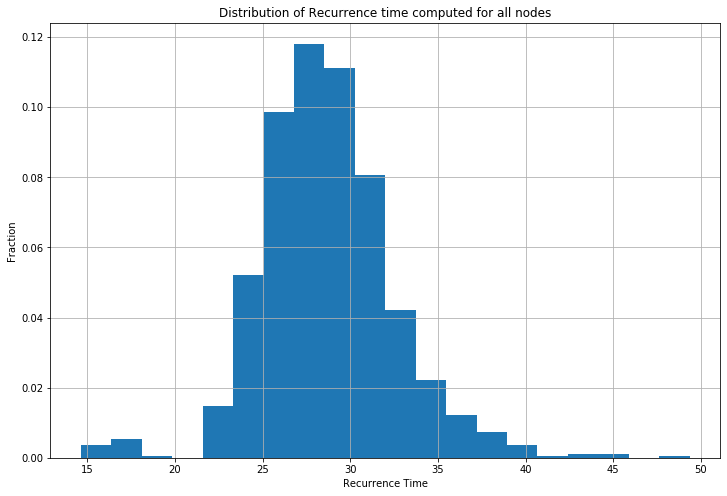

In [ ]:
RecurrenecTime_values_all_nodes=[average_recurrenceT_nodewise[i] for i in average_recurrenceT_nodewise]
bins=20
fsize=(12,8)
xlabel,ylabel,title="Recurrence Time(s)","Fraction","Distribution of Recurrence time computed for all nodes"
HistoGram(RecurrenecTime_values_all_nodes ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of recurrence time interval computed degreewise

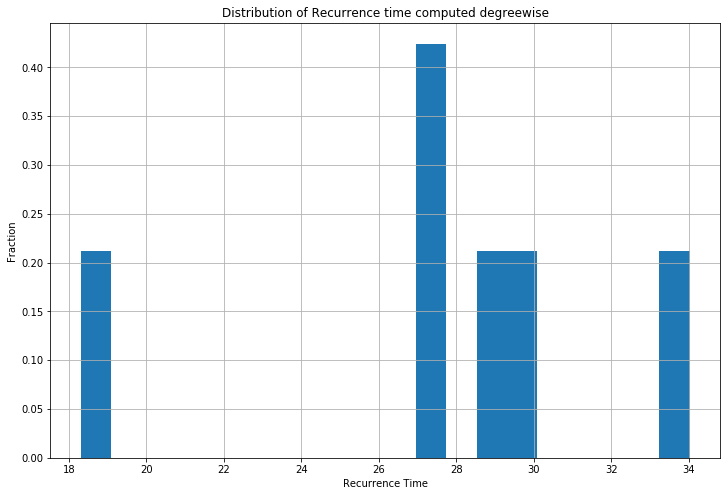

In [ ]:
RecurrenecTime_values_degreewise=[average_recurrenceT_degreewise[i] for i in average_recurrenceT_degreewise]
bins=20
fsize=(12,8)
xlabel,ylabel,title="Recurrence Time(s)","Fraction","Distribution of Recurrence time computed degreewise"
HistoGram(RecurrenecTime_values_degreewise ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
RecurrenecTime_values_degreewise

[18.309064125241807,
 34.01935140837932,
 28.68996822314374,
 27.417432247599315,
 27.022576470077087,
 29.533114323397726]

##Variation of Average recurrence time interval with degree

Text(0.5, 0, 'Degrees')

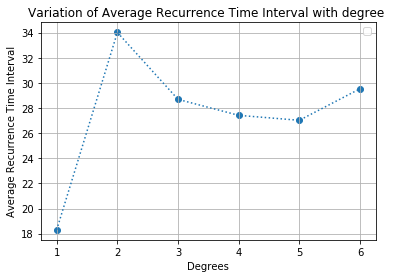

In [ ]:
extreme_eventP_degreewise=np.array([[j,average_recurrenceT_degreewise[j]] for j in average_recurrenceT_degreewise])
xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
plt.scatter(xarr,yarr)
plt.plot(xarr,yarr,ls=':')
plt.ylabel("Average Recurrence Time Interval(s)")
plt.title("Variation of Average Recurrence Time \nInterval with degree(s) ")
plt.grid()
plt.xlabel("Degrees")



#Computing magnitude of difference of Extreme Event

In [ ]:
nodewise_EE_abs_diff_dict=Absolute_diff_mag_EE(nodes,TimeSeries_each_node_dict,threshold_dict)

##Distribution of magnitude of difference of Extreme Events for a node

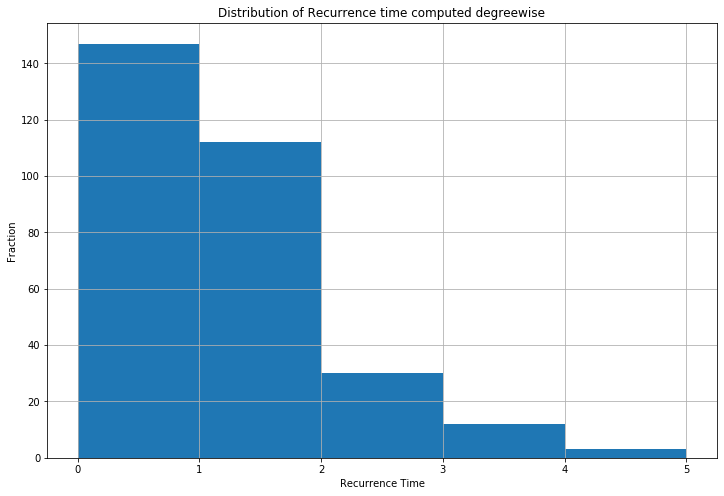

In [ ]:
EE_abs_diff_values_for_a_node=nodewise_EE_abs_diff_dict[44]
fsize=(12,8)
bins=[0,1,2,3,4,5]
xlabel,ylabel,title="Recurrence Time","Fraction","Distribution of Recurrence time computed degreewise"
HistoGram(EE_abs_diff_values_for_a_node ,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Computing Average magnitude of Extreme event difference nodewise and degreewise

In [ ]:
average_abs_diff_mag_EE_nodewise,average_abs_diff_mag_EE_degreewise=Average_Absolute_diff_mag_EE__Node_Degreewise(nodes,Nodes_with_Degree,nodewise_EE_abs_diff)

##Distribution of Average magnitude of difference of Extreme Events computed for all nodes

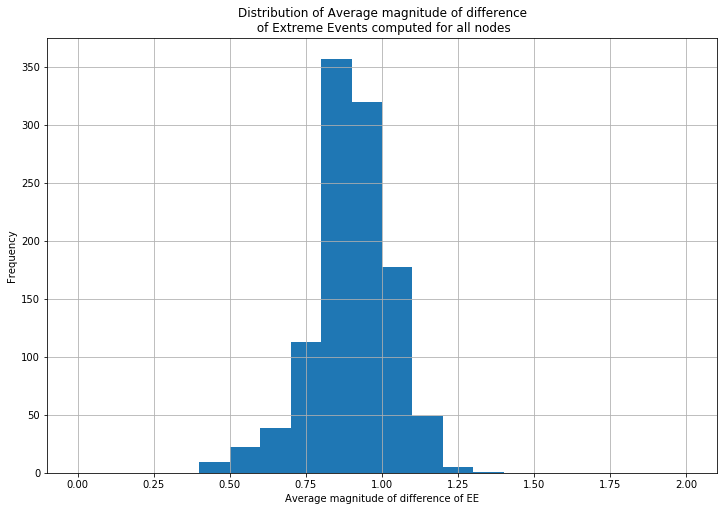

In [ ]:
average_abs_diff_mag_EE_all_nodes=[average_abs_diff_mag_EE_nodewise[i]for i in average_abs_diff_mag_EE_nodewise]
fsize=(12,8)
bins=[i/10 for i in range(0,21,1)]
xlabel,ylabel,title="Average magnitude of difference of EE","Frequency","Distribution of Average magnitude of difference\n of Extreme Events computed for all nodes"
HistoGram(average_abs_diff_mag_EE_all_nodes ,bins,False,1,xlabel,ylabel,'mid',title,fsize)

In [ ]:
average_abs_diff_mag_EE_degreewise

{1: 0.5185955874212471,
 2: 0.6956385604326225,
 3: 0.8892991541224943,
 4: 1.0286488336616206,
 5: 1.1383029070496602,
 6: 1.2072623218162892}

#Variation of Average Magnitude of difference of Extreme Event with degree

Text(0.5, 0, 'Degree')

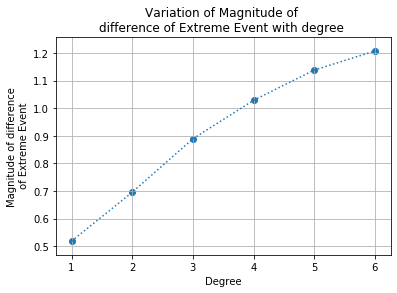

In [ ]:
average_abs_diff_mag_EE_degreewise_array=np.array([[j,average_abs_diff_mag_EE_degreewise[j]]for j in average_abs_diff_mag_EE_degreewise])
xarr,yarr=average_abs_diff_mag_EE_degreewise_array[::,0],average_abs_diff_mag_EE_degreewise_array[::,1]
plt.scatter(xarr,yarr)
plt.plot(xarr,yarr,ls=':')
ylabel="Magnitude of difference\n of Extreme Event"
title="Variation of Magnitude of \ndifference of Extreme Event with degree "
plt.grid()
plt.xlabel("Degree")